<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise/blob/main/GQtest_groupwise_(y_hat)_0_5_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise/groupwise_0.5_type_I _error'

In [4]:
os.listdir(base_path)

['data_groupwise_0.5_n20.csv',
 'data_groupwise_0.5_n30.csv',
 'data_groupwise_0.5_n60.csv',
 'data_groupwise_0.5_n120.csv',
 'data_groupwise_0.5_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.5_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,45.740240,79.966466,62.189076,-0.346015,197.549767,197.879868,-0.330102
1,0.0,1.0,32.882602,43.539384,94.097795,0.115328,180.635108,180.671240,-0.036131
2,0.0,2.0,78.630546,43.055962,55.726842,-1.254615,186.158735,187.148394,-0.989659
3,0.0,3.0,88.836992,36.916501,35.415178,-0.348448,170.820222,170.767399,0.052823
4,0.0,4.0,91.384223,20.685588,36.700994,0.474708,159.245513,158.348494,0.897019
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,45.310136,54.987368,98.159569,0.349976,208.807048,208.388497,0.418551
59996,999.0,56.0,83.063871,44.987504,24.058748,-1.289987,160.820136,162.320037,-1.499901
59997,999.0,57.0,38.405241,37.312761,35.786782,0.783965,122.288749,121.648285,0.640464
59998,999.0,58.0,72.183625,76.633063,45.231158,-1.033637,203.014209,203.986033,-0.971824


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,45.740240,79.966466,62.189076,-0.346015,197.549767,197.879868,-0.330102
1,0.0,1.0,32.882602,43.539384,94.097795,0.115328,180.635108,180.671240,-0.036131
2,0.0,2.0,78.630546,43.055962,55.726842,-1.254615,186.158735,187.148394,-0.989659
3,0.0,3.0,88.836992,36.916501,35.415178,-0.348448,170.820222,170.767399,0.052823
4,0.0,4.0,91.384223,20.685588,36.700994,0.474708,159.245513,158.348494,0.897019
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,45.310136,54.987368,98.159569,0.349976,208.807048,208.388497,0.418551
59996,999.0,56.0,83.063871,44.987504,24.058748,-1.289987,160.820136,162.320037,-1.499901
59997,999.0,57.0,38.405241,37.312761,35.786782,0.783965,122.288749,121.648285,0.640464
59998,999.0,58.0,72.183625,76.633063,45.231158,-1.033637,203.014209,203.986033,-0.971824


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    45.740240  79.966466  62.189076  ...  197.549767  197.879868 -0.330102
      1.0    32.882602  43.539384  94.097795  ...  180.635108  180.671240 -0.036131
      2.0    78.630546  43.055962  55.726842  ...  186.158735  187.148394 -0.989659
      3.0    88.836992  36.916501  35.415178  ...  170.820222  170.767399  0.052823
      4.0    91.384223  20.685588  36.700994  ...  159.245513  158.348494  0.897019
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   45.310136  54.987368  98.159569  ...  208.807048  208.388497  0.418551
      56.0   83.063871  44.987504  24.058748  ...  160.820136  162.320037 -1.499901
      57.0   38.405241  37.312761  35.786782  ...  122.288749  121.648285  0.640464
      58.0   72.183625  76.633063  45.231158  ...  203.014209  203.986033 -0.971824
      59.0   55.154207  28.416526  73.179655  ...  167.483673  166.924119  0.559554

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    45.740240  79.966466  62.189076  ...  197.549767  197.879868 -0.330102
      1.0    32.882602  43.539384  94.097795  ...  180.635108  180.671240 -0.036131
      2.0    78.630546  43.055962  55.726842  ...  186.158735  187.148394 -0.989659
      3.0    88.836992  36.916501  35.415178  ...  170.820222  170.767399  0.052823
      4.0    91.384223  20.685588  36.700994  ...  159.245513  158.348494  0.897019
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   45.310136  54.987368  98.159569  ...  208.807048  208.388497  0.418551
      56.0   83.063871  44.987504  24.058748  ...  160.820136  162.320037 -1.499901
      57.0   38.405241  37.312761  35.786782  ...  122.288749  121.648285  0.640464
      58.0   72.183625  76.633063  45.231158  ...  203.014209  203.986033 -0.971824
      59.0   55.154207  28.416526  73.179655  ...  167.483673  166.924119  0.559554

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,45.740240,79.966466,62.189076,-0.346015,197.549767,197.879868,-0.330102
1,0.0,1.0,32.882602,43.539384,94.097795,0.115328,180.635108,180.671240,-0.036131
2,0.0,2.0,78.630546,43.055962,55.726842,-1.254615,186.158735,187.148394,-0.989659
3,0.0,3.0,88.836992,36.916501,35.415178,-0.348448,170.820222,170.767399,0.052823
4,0.0,4.0,91.384223,20.685588,36.700994,0.474708,159.245513,158.348494,0.897019
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,45.310136,54.987368,98.159569,0.349976,208.807048,208.388497,0.418551
59996,999.0,56.0,83.063871,44.987504,24.058748,-1.289987,160.820136,162.320037,-1.499901
59997,999.0,57.0,38.405241,37.312761,35.786782,0.783965,122.288749,121.648285,0.640464
59998,999.0,58.0,72.183625,76.633063,45.231158,-1.033637,203.014209,203.986033,-0.971824


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    45.740240  79.966466  62.189076  ...  197.549767  197.879868 -0.330102
      1.0    32.882602  43.539384  94.097795  ...  180.635108  180.671240 -0.036131
      2.0    78.630546  43.055962  55.726842  ...  186.158735  187.148394 -0.989659
      3.0    88.836992  36.916501  35.415178  ...  170.820222  170.767399  0.052823
      4.0    91.384223  20.685588  36.700994  ...  159.245513  158.348494  0.897019
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   45.310136  54.987368  98.159569  ...  208.807048  208.388497  0.418551
      56.0   83.063871  44.987504  24.058748  ...  160.820136  162.320037 -1.499901
      57.0   38.405241  37.312761  35.786782  ...  122.288749  121.648285  0.640464
      58.0   72.183625  76.633063  45.231158  ...  203.014209  203.986033 -0.971824
      59.0   55.154207  28.416526  73.179655  ...  167.483673  166.924119  0.559554

[60000 rows x 7 columns]

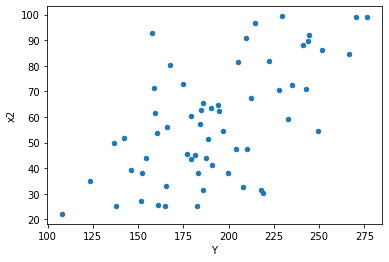

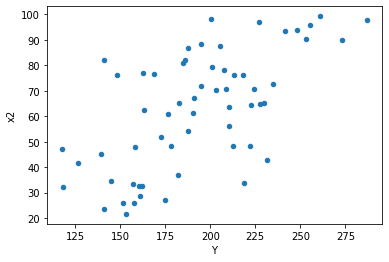

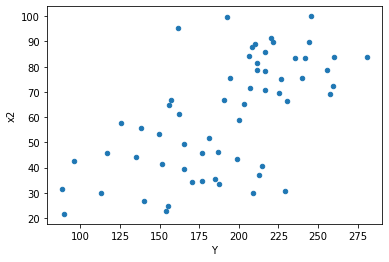

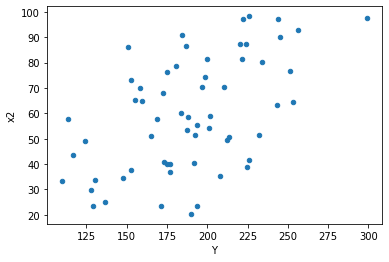

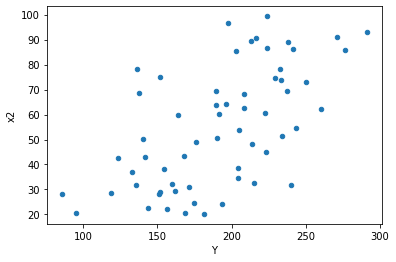

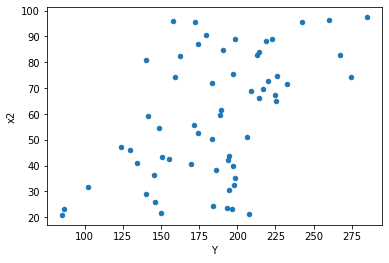

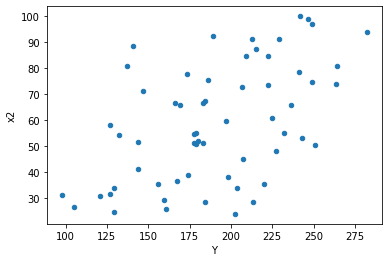

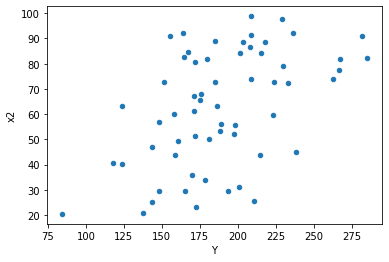

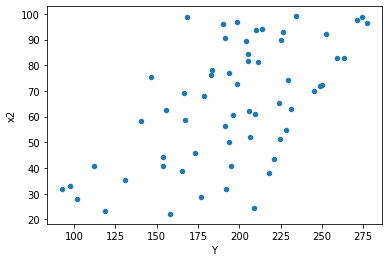

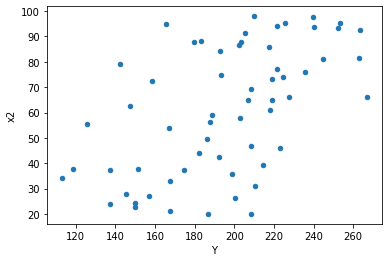

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='Y', y='x2', kind = 'scatter')
tablenew1.plot(x ='Y', y='x2', kind = 'scatter')
tablenew2.plot(x ='Y', y='x2', kind = 'scatter')
tablenew3.plot(x ='Y', y='x2', kind = 'scatter')
tablenew4.plot(x ='Y', y='x2', kind = 'scatter')
tablenew5.plot(x ='Y', y='x2', kind = 'scatter')
tablenew6.plot(x ='Y', y='x2', kind = 'scatter')
tablenew7.plot(x ='Y', y='x2', kind = 'scatter')
tablenew8.plot(x ='Y', y='x2', kind = 'scatter')
tablenew9.plot(x ='Y', y='x2', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,21.0,21.0,9.184782168680687,9.318266941799054,0.4373705794609851,0.4437269972285264,1.0145332541008472,0.9739385641439462,0.5130307179280269,0.4869692820719731,Reject005=1 : Homoscedasticity
1.0,21.0,21.0,7.470202550668176,13.08030347457603,0.35572393098419886,0.6228715940274301,1.7509971631767947,0.20755675227779546,0.8962216238611023,0.10377837613889773,Reject005=1 : Homoscedasticity
5.0,21.0,21.0,9.078749315552052,9.704034268938264,0.43232139597866914,0.4620968699494411,1.068873468321797,0.8801392448988057,0.5599303775505972,0.44006962244940284,Reject005=1 : Homoscedasticity
6.0,21.0,21.0,6.909650760560202,11.708027036762019,0.32903098859810487,0.5575250969886676,1.694445557739417,0.23510920766885013,0.8824453961655749,0.11755460383442506,Reject005=1 : Homoscedasticity
7.0,21.0,21.0,9.797375069266405,11.340472133317476,0.4665416699650669,0.5400224825389275,1.1575010707604372,0.7406282624328533,0.6296858687835734,0.37031413121642665,Reject005=1 : Homoscedasticity
9.0,21.0,21.0,5.929620868616549,8.68585838363648,0.28236289850554996,0.41361230398268956,1.464825252084455,0.3888257383052727,0.8055871308473637,0.19441286915263634,Reject005=1 : Homoscedasticity
10.0,21.0,21.0,13.318275410108425,13.623614312255494,0.6342035909575441,0.648743538678833,1.022926309356489,0.9590683784253455,0.5204658107873272,0.47953418921267277,Reject005=1 : Homoscedasticity
11.0,21.0,21.0,11.20535682150679,13.396531893396602,0.5335884200717519,0.637930090161743,1.195547103657085,0.6861194471165573,0.6569402764417214,0.34305972355827863,Reject005=1 : Homoscedasticity
12.0,21.0,21.0,8.449353307081372,8.96344901488629,0.40235015748006536,0.42683090547077573,1.0608443852589353,0.8936202342412396,0.5531898828793802,0.4468101171206198,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,9.184782168680687,9.318266941799054,0.4373705794609851,0.4437269972285264,1.0145332541008472,0.9739385641439462,Reject005=1 : Homoscedasticity
1.0,21.0,21.0,7.470202550668176,13.08030347457603,0.35572393098419886,0.6228715940274301,1.7509971631767947,0.20755675227779546,Reject005=1 : Homoscedasticity
2.0,21.0,21.0,9.25062868256508,8.5717842507329,0.4405061277411943,0.4081802024158524,0.9266164003413501,0.8630087568324065,Reject005=1 : Homoscedasticity
3.0,21.0,21.0,6.561417309124744,6.408555238453143,0.3124484432916545,0.3051692970691973,0.9767028884965112,0.9574351448962489,Reject005=1 : Homoscedasticity
4.0,21.0,21.0,8.848180557075521,5.3019627872432755,0.4213419312893105,0.252474418440156,0.5992150310499166,0.24874699082453963,Reject005=1 : Homoscedasticity
5.0,21.0,21.0,9.078749315552052,9.704034268938264,0.43232139597866914,0.4620968699494411,1.068873468321797,0.8801392448988057,Reject005=1 : Homoscedasticity
6.0,21.0,21.0,6.909650760560202,11.708027036762019,0.32903098859810487,0.5575250969886676,1.694445557739417,0.23510920766885013,Reject005=1 : Homoscedasticity
7.0,21.0,21.0,9.797375069266405,11.340472133317476,0.4665416699650669,0.5400224825389275,1.1575010707604372,0.7406282624328533,Reject005=1 : Homoscedasticity
8.0,21.0,21.0,11.840483850029914,6.288500942106106,0.5638325642871388,0.2994524258145765,0.5311016865320262,0.15524996771202504,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      938
Reject005=0 : Heteroscedasticity     62
Name: Result_test, dtype: int64